In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,NaN,3.0
1,0.0,67.0,3.0,115.0,NaN,0.0,NaN,160.0,0.0,1.6,2.0,0.0,NaN
2,NaN,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,NaN
3,NaN,64.0,4.0,128.0,263.0,0.0,0.0,105.0,NaN,NaN,2.0,NaN,7.0
4,NaN,74.0,2.0,NaN,269.0,0.0,2.0,121.0,1.0,0.2,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,NaN,172.0,NaN,NaN,NaN,162.0,0.0,0.5,1.0,0.0,7.0
266,NaN,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,NaN,56.0,2.0,140.0,294.0,NaN,2.0,153.0,0.0,1.3,2.0,0.0,NaN
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,NaN,0.4,2.0,NaN,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	44
float64		column 2	56
float64		column 3	14
float64		column 4	70
float64		column 5	72
float64		column 6	42
float64		column 7	28
float64		column 8	44
float64		column 9	58
float64		column 10	70
float64		column 11	44
float64		column 12	56
float64		column 13	86


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,226.000000,214.000000,256.000000,200.000000,198.000000,228.000000,242.000000,226.000000,212.000000,200.000000,226.000000,214.000000,184.000000
mean,0.672566,54.738318,3.195312,131.255000,249.000000,0.144737,1.033058,150.181416,0.311321,0.963000,1.566372,0.616822,4.701087
std,0.470319,8.895678,0.941910,16.727793,43.308245,0.352609,0.997373,22.232665,0.464130,1.090263,0.609205,0.905330,1.936929
min,0.000000,29.000000,1.000000,94.000000,141.000000,0.000000,0.000000,95.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,49.000000,3.000000,120.000000,217.250000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,246.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.425000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

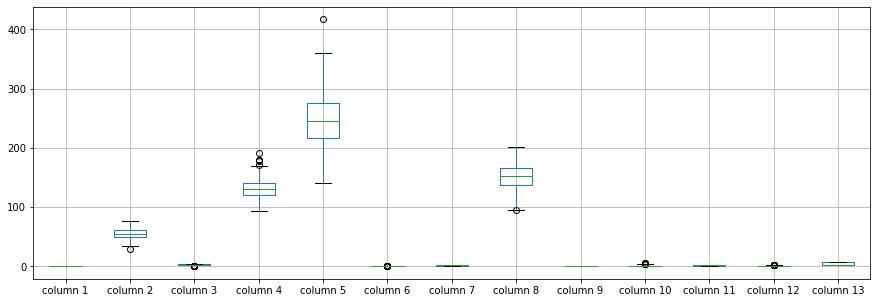

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.672566
column 2      54.738318
column 3       3.195312
column 4     131.255000
column 5     249.000000
column 6       0.144737
column 7       1.033058
column 8     150.181416
column 9       0.311321
column 10      0.963000
column 11      1.566372
column 12      0.616822
column 13      4.701087
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.077648,-0.020080,0.003446,-0.105728,-0.004601,0.063923,-0.040920,0.151358,0.138129,0.011535,0.191561,0.445476
column 2,-0.077648,1.000000,0.082620,0.246753,0.195922,0.123117,0.160065,-0.428852,0.052578,0.137653,0.193249,0.254282,0.117007
column 3,-0.020080,0.082620,1.000000,-0.008700,0.037627,-0.118395,0.070034,-0.273122,0.319193,0.194079,0.160737,0.242468,0.322997
column 4,0.003446,0.246753,-0.008700,1.000000,0.206747,0.150899,0.043015,0.037586,0.061207,0.133044,-0.000719,-0.008079,0.044317
column 5,-0.105728,0.195922,0.037627,0.206747,1.000000,0.070404,0.068991,-0.035810,0.152273,-0.051094,-0.039701,0.212965,0.024392
column 6,-0.004601,0.123117,-0.118395,0.150899,0.070404,1.000000,0.062537,0.004713,0.112473,-0.032961,0.158912,0.129305,-0.032461
column 7,0.063923,0.160065,0.070034,0.043015,0.068991,0.062537,1.000000,-0.086569,0.108647,0.098489,0.208343,0.154229,-0.029598
column 8,-0.040920,-0.428852,-0.273122,0.037586,-0.035810,0.004713,-0.086569,1.000000,-0.362335,-0.279270,-0.383599,-0.231214,-0.293855
column 9,0.151358,0.052578,0.319193,0.061207,0.152273,0.112473,0.108647,-0.362335,1.000000,0.205306,0.271640,0.139059,0.359564
column 10,0.138129,0.137653,0.194079,0.133044,-0.051094,-0.032961,0.098489,-0.279270,0.205306,1.000000,0.540499,0.180705,0.295830


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [20]:
imputer = md.Midas(layer_structure = [13,13+109,13+109+109,13+109+109+109,13+109+109+109+109,13+109+109+109+109+109,13+109+109+109+109,13+109+109+109,13+109+109,13+109,13], vae_layer = False, seed = 109)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 461.633825302124
Epoch: 1 , loss: 467.4449043273926
Epoch: 2 , loss: 466.1489562988281
Epoch: 3 , loss: 466.25486755371094
Epoch: 4 , loss: 463.18420600891113
Epoch: 5 , loss: 468.5590000152588
Epoch: 6 , loss: 468.9843120574951
Epoch: 7 , loss: 469.67757987976074
Epoch: 8 , loss: 465.98777961730957
Epoch: 9 , loss: 463.43861961364746
Epoch: 10 , loss: 466.47069549560547
Epoch: 11 , loss: 460.5585231781006
Epoch: 12 , loss: 461.8034420013428
Epoch: 13 , loss: 458.7022285461426
Epoch: 14 , loss: 457.14269638061523
Epoch: 15 , loss: 458.16220474243164
Epoch: 16 , loss: 452.33394622802734
Epoch: 17 , loss: 451.4187297821045
Epoch: 18 , loss: 442.56889724731445
Epoch: 19 , loss: 424.1912651062012
Epoch: 20 , loss: 400.2195816040039
Epoch: 21 , loss: 387.31834602355957
Epoch: 22 , loss: 371.10356521606445
Epoch: 23 , loss: 343.29137992858887
Epoch: 24 , loss: 328.77344131469727
Epoch: 25 , loss: 321.9138450

In [21]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [22]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      1.019151
column 12      0.402103
column 13      3.000000
Name: 21, dtype: float64

In [23]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [24]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-2.267492,0.000000
1,0.000000,0.0,0.000000,0.000000,-386.424683,0.000000,-1.258920,0.0,0.000000,0.000000,0.0,0.000000,-3.591757
2,-0.012739,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.926024
3,-0.773643,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.679234,-0.778356,0.0,-0.292322,0.000000
4,0.376952,0.0,0.000000,-2.068588,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-0.543912,2.023551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,-1.027072,0.000000,-47.463394,-0.811019,0.701761,0.0,0.000000,0.000000,0.0,0.000000,0.000000
266,-0.712310,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
267,0.343778,0.0,0.000000,0.000000,0.000000,0.050558,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-1.523678
268,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.292714,0.000000,0.0,0.221791,0.000000


Calculating NRMSE Value

In [25]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [26]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [27]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1609.0584950612595, 5414.752392307519)

In [28]:
NRMS=numerator/denominator
NRMS


0.29716197131140704

In [29]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       0.966597
column 8     186.000000
column 9       1.000000
column 10      0.139845
column 11      1.000000
column 12      0.000000
column 13      4.365051
Name: 66, dtype: float64

In [30]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4.000000,130.000000,322.000000,0.000000,2.000000,109.0,0.000000,2.400000,2.0,0.732508,3.000000
1,0.000000,67.0,3.000000,115.000000,177.575317,0.000000,0.741080,160.0,0.000000,1.600000,2.0,0.000000,3.408243
2,0.987261,57.0,2.000000,124.000000,261.000000,0.000000,0.000000,141.0,0.000000,0.300000,1.0,0.000000,8.926024
3,0.226357,64.0,4.000000,128.000000,263.000000,0.000000,0.000000,105.0,0.320766,-0.578356,2.0,0.707678,7.000000
4,0.376952,74.0,2.000000,117.931412,269.000000,0.000000,2.000000,121.0,1.000000,0.200000,1.0,0.456088,5.023551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,1.972928,172.000000,151.536606,0.188981,0.701761,162.0,0.000000,0.500000,1.0,0.000000,7.000000
266,0.287690,44.0,2.000000,120.000000,263.000000,0.000000,0.000000,173.0,0.000000,0.000000,1.0,0.000000,7.000000
267,0.343778,56.0,2.000000,140.000000,294.000000,0.050558,2.000000,153.0,0.000000,1.300000,2.0,0.000000,1.476322
268,1.000000,57.0,4.000000,140.000000,192.000000,0.000000,0.000000,148.0,0.292714,0.400000,2.0,0.221791,6.000000


In [31]:
imputations[-1].to_excel("Sheart_NE_20(imp).xlsx", index=False, header=False)